Hierarchial Clustering

In [7]:
# import libraries
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [8]:
#Loading  the dataset
data= pd.read_csv('environmental_socioeconomic.csv')
data

,co2_emissions,waste_production,gdp,population
0,218.543053,436.276737,39199.932440,6.417631e+07
1,477.821438,399.620887,17380.479824,4.646995e+07
2,379.397274,258.538521,23865.587775,9.648535e+07
3,319.396318,646.540003,36531.225474,2.267887e+07
4,120.208388,528.961744,29283.573781,5.919779e+07
...,...,...,...,...
9995,435.945195,889.334766,48091.018014,7.564936e+07
9996,453.878976,142.132562,39912.968447,7.668817e+07
9997,476.018562,373.328622,10778.234513,2.768737e+07
9998,228.869597,498.988006,26040.193699,4.399766e+07


In [9]:
#Normalise the feature using standardscaler
scaler = StandardScaler()
data_scaled= scaler.fit_transform(data)
print(pd.DataFrame(data_scaled,columns=data.columns).head())

   co2_emissions  waste_production       gdp  population
0      -0.415900         -0.452465  0.801884    0.482494
1       1.587377         -0.593258 -1.100359   -0.136414
2       0.826917         -1.135149 -0.534981    1.611824
3       0.363328          0.355146  0.569224   -0.968007
4      -1.175669         -0.096466 -0.062635    0.308475


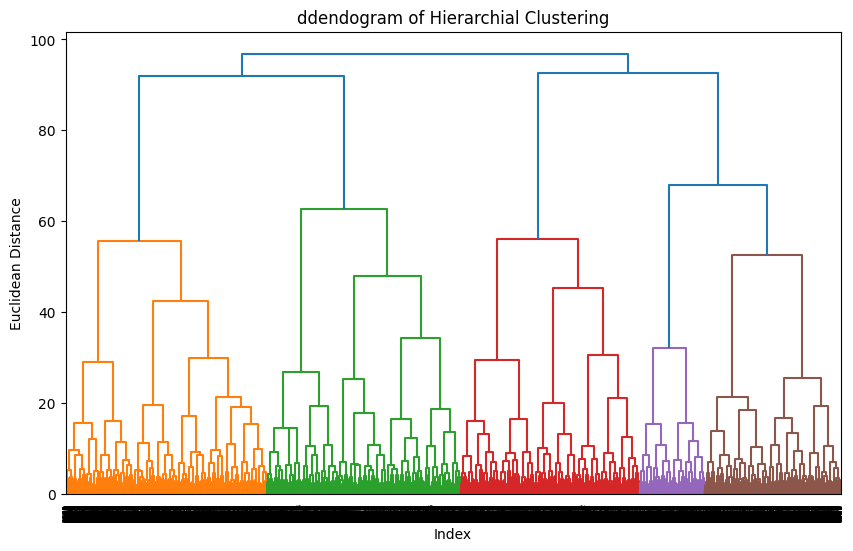

In [10]:
#Create a dendogram to visualise the hierarchial clustering process
plt.figure(figsize=(10,6))
dendogram = sch.dendrogram(sch.linkage(data_scaled,method='ward'))
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.title('ddendogram of Hierarchial Clustering')
plt.show()

In [13]:
#apply agglomerative clustering assuming 7 clusters
hierarchial_clustering= AgglomerativeClustering(n_clusters=7,linkage='ward')
data['cluster']= hierarchial_clustering.fit_predict(data_scaled)
print(data.head())

   co2_emissions  waste_production           gdp    population  cluster
0     218.543053        436.276737  39199.932440  6.417631e+07        0
1     477.821438        399.620887  17380.479824  4.646995e+07        3
2     379.397274        258.538521  23865.587775  9.648535e+07        3
3     319.396318        646.540003  36531.225474  2.267887e+07        2
4     120.208388        528.961744  29283.573781  5.919779e+07        5


In [15]:
sil_score =silhouette_score(data_scaled, data['cluster'])
print(f'silhouette_score:{sil_score}')

silhouette_score:0.11340626237860431


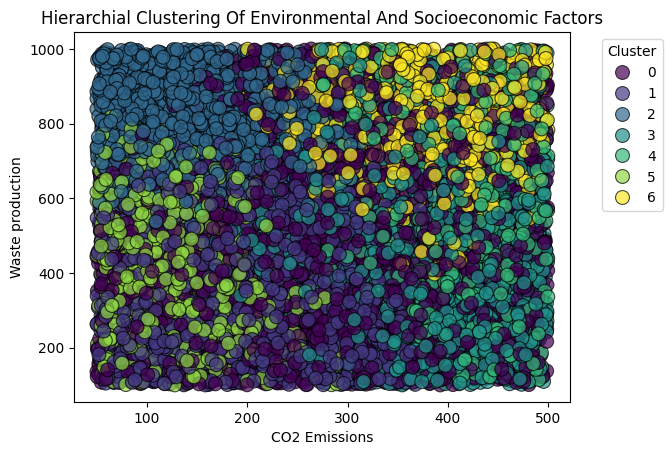

In [17]:
#visualise using co2 emissions and waste production
plt.Figure(figsize=(8,6))
sns.scatterplot(x='co2_emissions',y='waste_production',hue='cluster',
                data=data ,palette='viridis',s=100,alpha=0.7,edgecolor='k')
plt.title('Hierarchial Clustering Of Environmental And Socioeconomic Factors')
plt.xlabel('CO2 Emissions')
plt.ylabel('Waste production')
plt.legend(title='Cluster',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()